# __Modelo Machine Learning__

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rev1= pd.read_parquet('Reviews/rev1.gzip')
rev2= pd.read_parquet('Reviews/rev2.gzip')
rev3= pd.read_parquet('Reviews/rev3.gzip')
rev4= pd.read_parquet('Reviews/rev4.gzip')
rev5= pd.read_parquet('Reviews/rev5.gzip')
rev6= pd.read_parquet('Reviews/rev6.gzip')
rev7= pd.read_parquet('Reviews/rev7.gzip')
rev8= pd.read_parquet('Reviews/rev8.gzip')

In [6]:
reviews= pd.concat([rev1, rev2, rev3, rev4, rev5, rev6, rev7, rev8])

In [34]:
reviews.head()

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [8]:
reviews.dtypes

userId         int64
rating       float64
timestamp      int64
movieId       object
dtype: object

In [41]:
df_title = pd.read_csv('app/df_final.csv',index_col = 0, header = None, usecols = [2,5], names = ['Movie_Id', 'Name'], skiprows=[0])
df_title.head()

,Name
Movie_Id,
ns1,dick johnson is dead
ns2,blood & water
ns3,ganglands
ns4,jailbirds new orleans
ns5,kota factory


In [15]:
movie_id = 30
print(df_title.loc[movie_id].Name)

ankahi kahaniya


In [81]:
df_title

,Name
Movie_Id,
ns1,dick johnson is dead
ns2,blood & water
ns3,ganglands
ns4,jailbirds new orleans
ns5,kota factory
...,...
as9664,pride of the bowery
as9665,planet patrol
as9666,outpost


In [24]:
print(len(reviews['userId'].unique()))

115077


In [30]:
# Calificaciones de películas por usuario

df1_by_users = reviews.groupby(['userId']).count()
df1_by_users.head()

,rating,timestamp,movieId
userId,,,
1,27,27,27
2,22,22,22
3,10,10,10
4,62,62,62
5,26,26,26


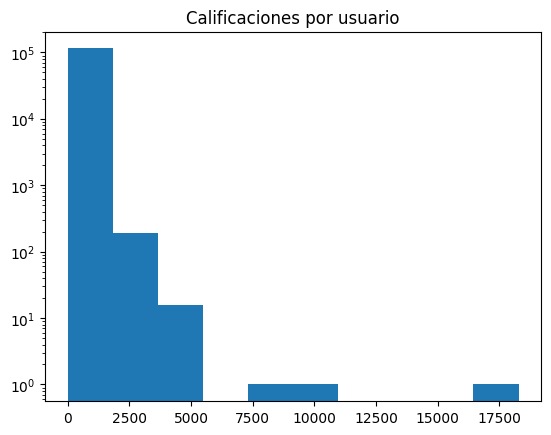

In [31]:
plt.hist(df1_by_users.rating, log= True)
plt.title('Calificaciones por usuario')
plt.show()

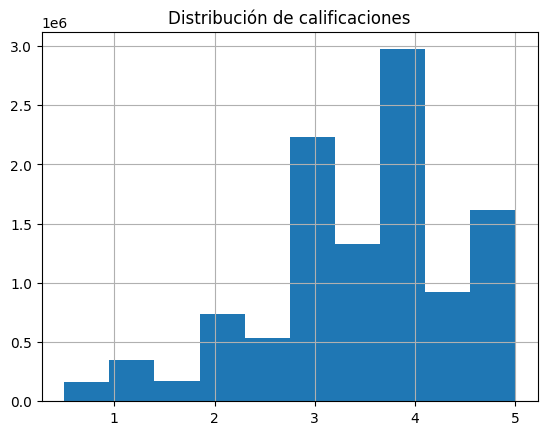

In [32]:
reviews['rating'].hist()
plt.title('Distribución de calificaciones')
plt.show()

Veamos cuál es la película que más calificaciones tiene y cuál la que menos

In [35]:
#Agrupar por movieId para saber el conteo de revisiones que tiene cada uno 

df1_by_movies = reviews.groupby(['movieId']).count()
df1_by_movies.head()

,userId,rating,timestamp
movieId,,,
as1,502,502,502
as10,513,513,513
as100,430,430,430
as1000,485,485,485
as1001,469,469,469


In [43]:
# Pelicula con mayores calificaciones

idx_max = df1_by_movies['userId'].idxmax()
print(df_title.loc[idx_max].Name)

from other worlds


In [45]:
# Pelicula con menos calificaciones
idx_min = df1_by_movies['userId'].idxmin()
print(df_title.loc[idx_min].Name)

mitzi (nbc 1968)


Películas más populares (10) 

In [48]:
df1_by_movies = reviews.groupby(['movieId']).count()
df1_by_movies.sort_values('userId', ascending = False, inplace = True)
df1_by_movies['Vistos'] = df1_by_movies['userId']
df1_by_movies.drop(columns = ['userId','rating'], inplace = True)
df1_by_movies.head(10)

,timestamp,Vistos
movieId,,
as4197,576,576
as9065,560,560
ns7279,558,558
as848,558,558
hs2360,556,556
as6998,556,556
as9469,556,556
as4889,554,554
hs582,554,554


In [50]:
df_title.shape

(22998, 1)

In [51]:
print(df_title.loc[idx_max].Name)

from other worlds


In [52]:
df1_by_movies['Titulo'] = df_title.loc[df1_by_movies.index].Name

In [53]:
df1_by_movies.head()

,timestamp,Vistos,Titulo
movieId,,,
as4197,576,576,from other worlds
as9065,560,560,the organization
ns7279,558,558,"leapfrog: sing-along, read-along"
as848,558,558,superbook
hs2360,556,556,dietland


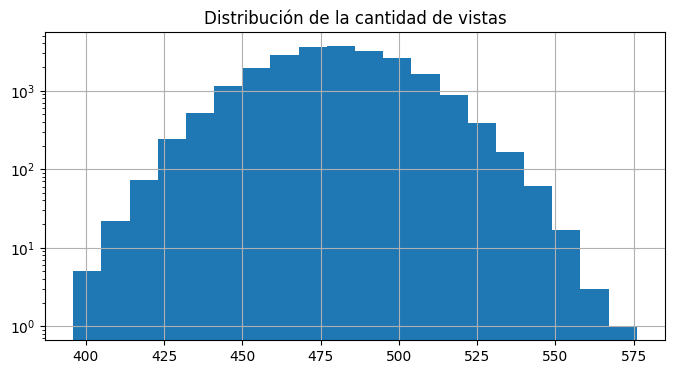

In [54]:
plt.figure(figsize = (8,4))

df1_by_movies.Vistos[df1_by_movies.Vistos<1000].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de vistas')

plt.show()

In [65]:
umbral = 1000
mascara_pocos_vistos = df1_by_movies.Vistos<umbral

In [66]:
peliculas_pocos_vistos = mascara_pocos_vistos[mascara_pocos_vistos].index.values
print(len(peliculas_pocos_vistos), peliculas_pocos_vistos)

22998 ['as4197' 'as9065' 'ns7279' ... 'hs1711' 'ns2144' 'as4940']


In [69]:
mascara_descartables = reviews.movieId.isin(peliculas_pocos_vistos)
mascara_descartables.value_counts()

True    11024289
Name: movieId, dtype: int64

In [64]:
# Obsevamos cómo cambia la cantidad de registros a partir del filtrado

print(reviews.shape)
df1 = reviews[~mascara_descartables]
print(df1.shape)

(11024289, 4)
(11024289, 4)


# __Machine Learning__

In [80]:
import sys
#!conda activate henry-bootcamp
#!conda install -c conda-forge scikit-surprise 
from surprise import Dataset
from surprise import Reader
from sklearn.model_selection import train_test_split

In [ ]:
reader = Reader()

In [ ]:
N_filas = 100000

data = Dataset.load_from_df(reviews[['userId', 'movieId', 'rating']][:N_filas], reader)

1.- Cálculo de simililaridad entre usuarios

Correlación de Pearson, coseno, correlación con restricciones, coeficiente de Spearman, diferencia cuadrática media (MSD) e índice  de Jaccard (JMSD)

2.- Calcular los K-Vecinos 

Usando métrica de similaridad seleccionada y se obtienen usuarios más similares al usuario activo 

3.- Calcular predicciones de los items 

A partir de los vecinos se determinan las posibles valoraciones que el usuario activo haría sobre los items que no ha votado

4.- Realizar recomendaciones 

Se eligen los items más adecuados para ser recomendados por el usuario. Predicciones más altas, más novedosas, más votadas 